In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import serial
from scipy import fftpack

cutoff = 1000
sample = 44102
taps   = 15

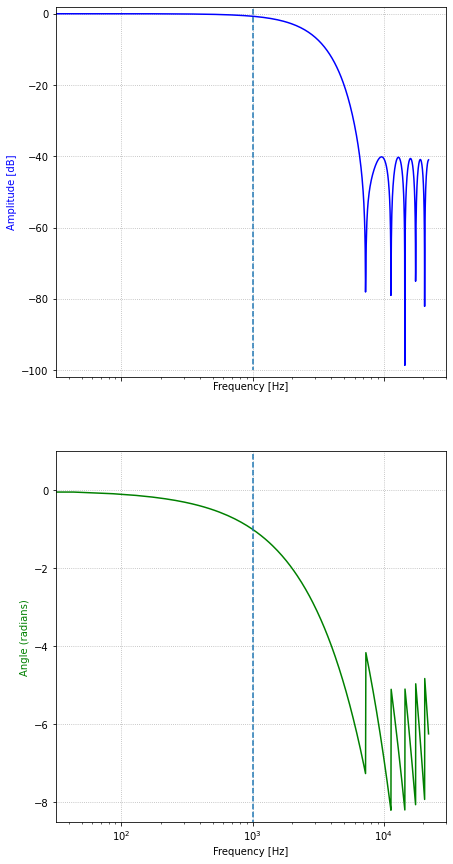

In [2]:
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='lowpass')
w, h = signal.freqz(b)

fig, (ax1, ax2) = plt.subplots(nrows = 2,sharex=True, figsize=(7,15))
#fig.suptitle('Digital filter frequency response', fontsize=15)

ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(linestyle='dotted')
ax1.set_xscale('log')
ax1.vlines(cutoff, min(20 * np.log10(abs(h)))+100, max(20 * np.log10(abs(h)))-100, linestyle='dashed')
ax1.set_ylim(bottom=-102, top=2)


angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(linestyle='dotted')
ax2.vlines(cutoff, -200, 50, linestyle='dashed')
ax2.set_ylim(bottom=-8.5, top=1)
#ax2.axis('tight')
plt.show()

fig.savefig('figures/low_pass_15_taps.pdf')


In [3]:
b

array([0.00906975, 0.01491539, 0.03127   , 0.05576935, 0.08385311,
       0.10978818, 0.12803422, 0.13459999, 0.12803422, 0.10978818,
       0.08385311, 0.05576935, 0.03127   , 0.01491539, 0.00906975])

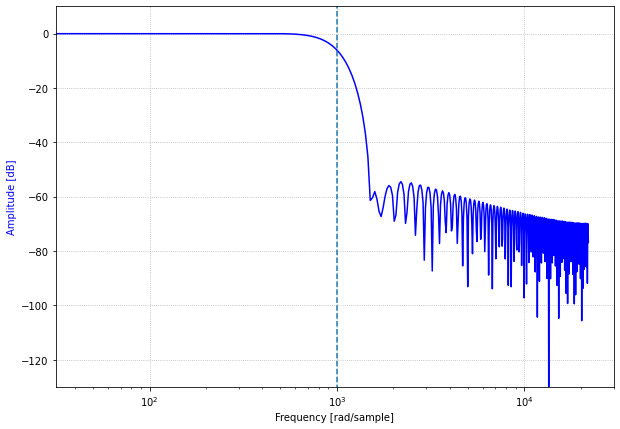

In [4]:
b    = signal.firwin(numtaps=150, cutoff=cutoff, fs=sample, pass_zero='lowpass')
w, h = signal.freqz(b)

fig, ax1 = plt.subplots(figsize=(10,7))
#ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xscale('log')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-130, top=10)
ax1.grid(linestyle='dotted')

'''ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
'''

fig.savefig('figures/low_pass_150_taps.pdf')

"\nax2 = ax1.twinx()\nangles = np.unwrap(np.angle(h))\nax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')\nax2.set_ylabel('Angle (radians)', color='g')\nax2.grid()\nax2.axis('tight')\nplt.show()"

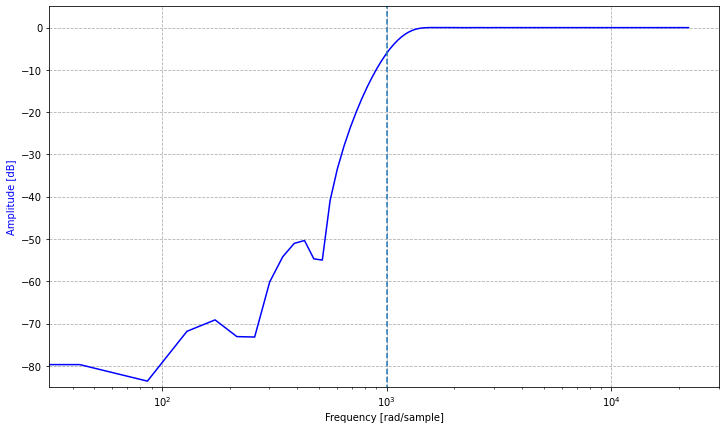

In [5]:
b    = signal.firwin(numtaps=151, cutoff=cutoff, fs=sample, pass_zero='highpass')
w, h = signal.freqz(b)

fig, ax1 = plt.subplots(figsize=(12,7))
#ax1.set_title('Digital filter frequency response')
ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.set_xscale('log')
ax1.grid(linestyle='dashed')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-85, top=5)
'''
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()'''

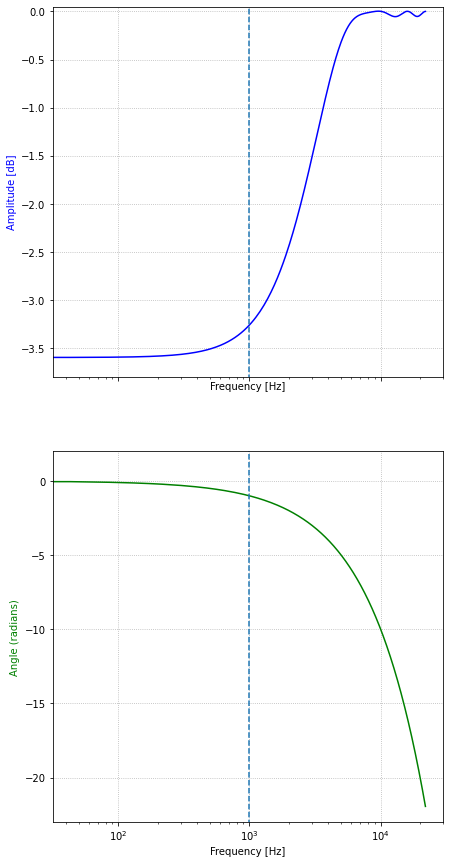

In [6]:
b    = signal.firwin(numtaps=taps, cutoff=cutoff, fs=sample, pass_zero='highpass')
w, h = signal.freqz(b)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize=(7,15), sharex=True)
#fig.suptitle('Digital filter frequency response', fontsize=15)

ax1.plot(w/np.pi*sample/2, 20 * np.log10(abs(h)), color='b', label='Amplitude')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.grid(linestyle='dotted')
ax1.set_xscale('log')
ax1.vlines(cutoff, -200, 50, linestyle='dashed')
ax1.set_ylim(bottom=-3.8, top=.05)


angles = np.unwrap(np.angle(h))
ax2.plot(w/np.pi*sample/2, angles, color='g', label='Phase')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(linestyle='dotted')
ax2.vlines(cutoff, -200, 50, linestyle='dashed')
ax2.set_ylim(bottom=-23, top=2)
#ax2.axis('tight')
plt.show()


fig.savefig('figures/high_pass_15_taps.pdf')


In [7]:
b


array([-0.00304664, -0.00501025, -0.01050396, -0.01873358, -0.02816724,
       -0.03687913, -0.04300819,  0.95179387, -0.04300819, -0.03687913,
       -0.02816724, -0.01873358, -0.01050396, -0.00501025, -0.00304664])

In [8]:
!ls /dev

acpi_thermal_rel  loop14  loop53	ptmx	  tty22  tty61	    uinput
autofs		  loop15  loop54	pts	  tty23  tty62	    urandom
block		  loop16  loop55	random	  tty24  tty63	    userio
bsg		  loop17  loop56	rfkill	  tty25  tty7	    v4l
btrfs-control	  loop18  loop57	rtc	  tty26  tty8	    vboxdrv
bus		  loop19  loop58	rtc0	  tty27  tty9	    vboxdrvu
char		  loop2   loop59	sda	  tty28  ttyprintk  vboxnetctl
console		  loop20  loop6		sda1	  tty29  ttyS0	    vboxusb
core		  loop21  loop60	sdb	  tty3	 ttyS1	    vcs
cpu		  loop22  loop61	sdb1	  tty30  ttyS10     vcs1
cpu_dma_latency   loop23  loop62	sdb2	  tty31  ttyS11     vcs2
cuse		  loop24  loop63	sdb3	  tty32  ttyS12     vcs3
disk		  loop25  loop64	sdb4	  tty33  ttyS13     vcs4
dma_heap	  loop26  loop65	sdb5	  tty34  ttyS14     vcs5
dri		  loop27  loop66	sdb6	  tty35  ttyS15     vcs6
drm_dp_aux0	  loop28  loop67	sdb7	  tty36  ttyS16     vcsa
ecryptfs	  loop29  loop68	serial	  tty37  ttyS17     vcsa1
fb0		  loop3   loop69	sg0	  tty38  ttyS18    

In [4]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(12000000)

print('ok')

out_l = np.array(list(d[0:len(d):2]))
out_r = np.array(list(d[1:len(d):2]))
for i in range(len(out_l)):
    if out_l[i] > 127:
        out_l[i] = out_l[i] - 256

for i in range(len(out_r)):
    if out_r[i] > 127:
        out_r[i] = out_r[i] - 256

ok


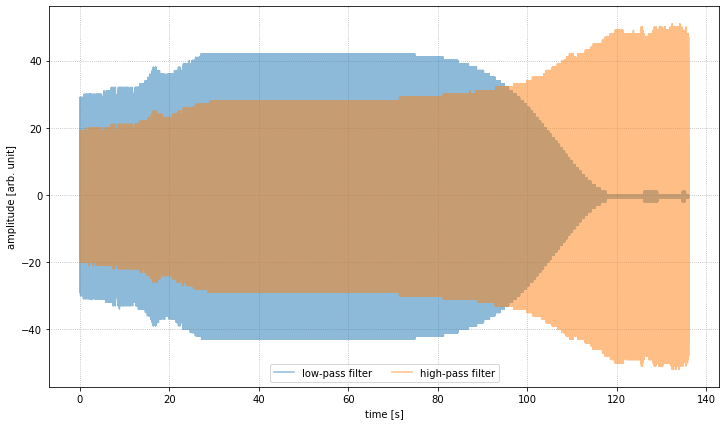

In [13]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_l))*0.0000226747086299941, out_l, alpha=.5, label = 'low-pass filter')
ax.plot(np.arange(len(out_r))*0.0000226747086299941, out_r, alpha=.5, label = 'high-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time.pdf')


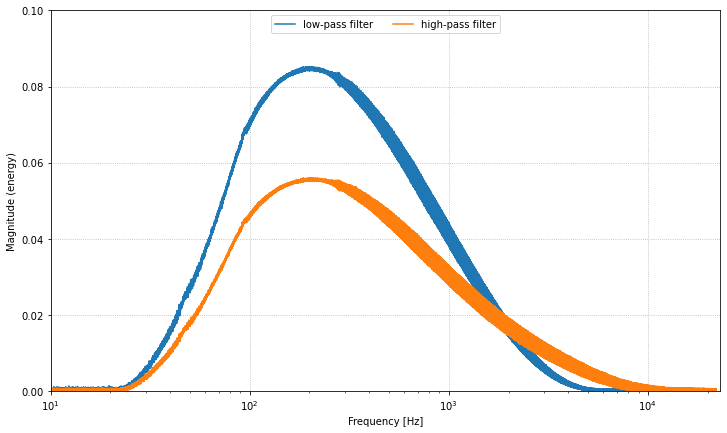

In [24]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_l, Fs=44102, label = 'low-pass filter')
ax.magnitude_spectrum(out_r, Fs=44102, label = 'high-pass filter')
ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=10)
ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq.pdf')

In [15]:
np.savetxt('data/range_time_l.csv', out_l, delimiter=',')
np.savetxt('data/range_time_r.csv', out_r, delimiter=',')

In [35]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(1000000)

print('ok')

out_l_mul = np.array(list(d[0:len(d):2]))
out_r_mul = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_mul)):
    if out_l_mul[i] > 127:
        out_l_mul[i] = out_l_mul[i] - 256

for i in range(len(out_r_mul)):
    if out_r_mul[i] > 127:
        out_r_mul[i] = out_r_mul[i] - 256

ok


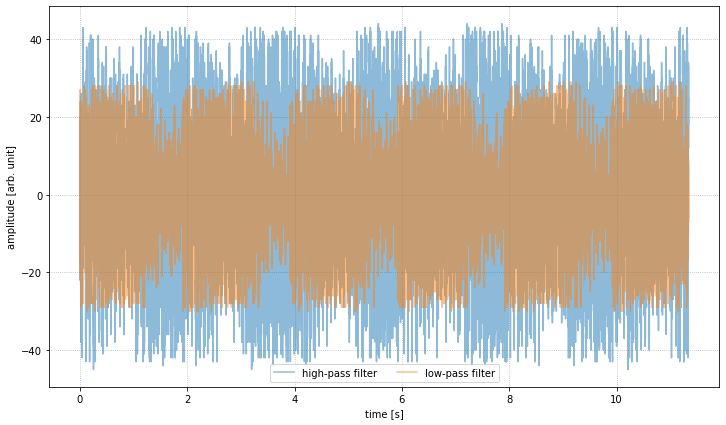

In [38]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_mul))*0.0000226747086299941, out_r_mul, alpha=.5, label = 'high-pass filter')
ax.plot(np.arange(len(out_l_mul))*0.0000226747086299941, out_l_mul, alpha=.5, label = 'low-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time_mul.pdf')


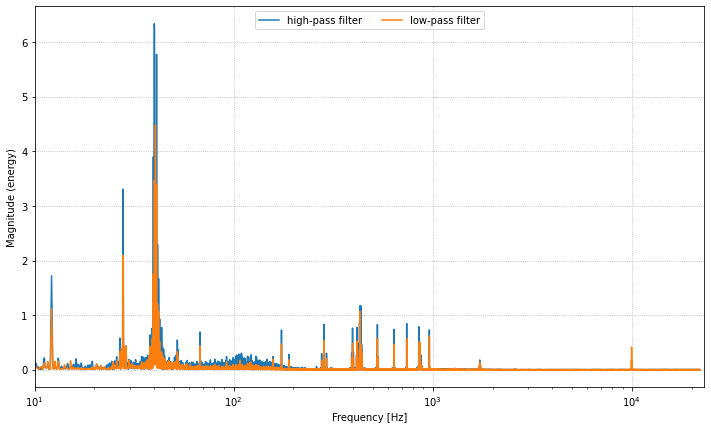

In [39]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_r_mul, Fs=44102, label = 'high-pass filter')
ax.magnitude_spectrum(out_l_mul, Fs=44102, label = 'low-pass filter')
ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=10)
ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq_mul.pdf')

In [41]:
np.savetxt('data/range_time_l_mul.csv', out_l_mul, delimiter=',')
np.savetxt('data/range_time_r_mul.csv', out_r_mul, delimiter=',')

In [42]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(1000000)

print('ok')

out_l_200 = np.array(list(d[0:len(d):2]))
out_r_200 = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_200)):
    if out_l_200[i] > 127:
        out_l_200[i] = out_l_200[i] - 256

for i in range(len(out_r_200)):
    if out_r_200[i] > 127:
        out_r_200[i] = out_r_200[i] - 256

ok


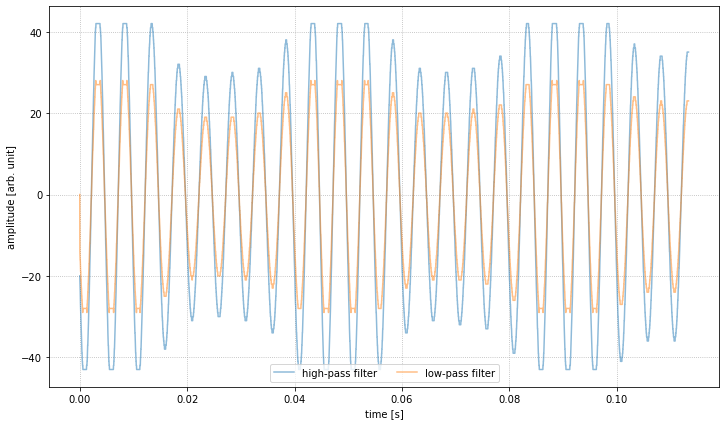

In [46]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_200[:5000]))*0.0000226747086299941, out_r_200[:5000], alpha=.5, label = 'high-pass filter')
ax.plot(np.arange(len(out_l_200[:5000]))*0.0000226747086299941, out_l_200[:5000], alpha=.5, label = 'low-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time_200.pdf')


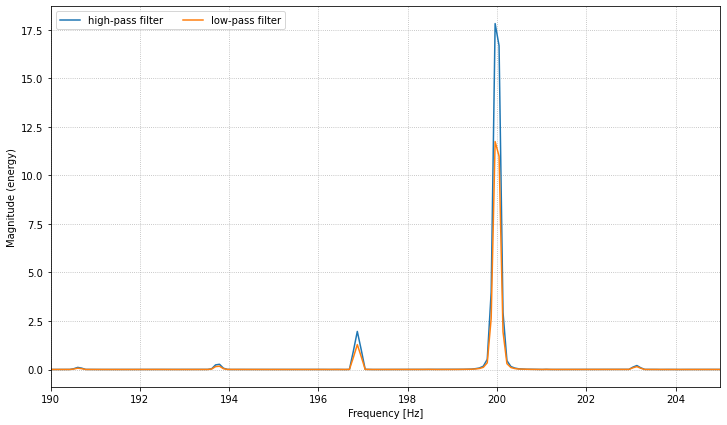

In [52]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_r_200, Fs=44102, label = 'high-pass filter')
ax.magnitude_spectrum(out_l_200, Fs=44102, label = 'low-pass filter')
ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper left', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=190, right=205)
#ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq_200.pdf')

In [53]:
np.savetxt('data/range_time_l_200.csv', out_l_200, delimiter=',')
np.savetxt('data/range_time_r_200.csv', out_r_200, delimiter=',')

In [55]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(1000000)

print('ok')

out_l_10k = np.array(list(d[0:len(d):2]))
out_r_10k = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_10k)):
    if out_l_10k[i] > 127:
        out_l_10k[i] = out_l_10k[i] - 256

for i in range(len(out_r_10k)):
    if out_r_10k[i] > 127:
        out_r_10k[i] = out_r_10k[i] - 256

ok


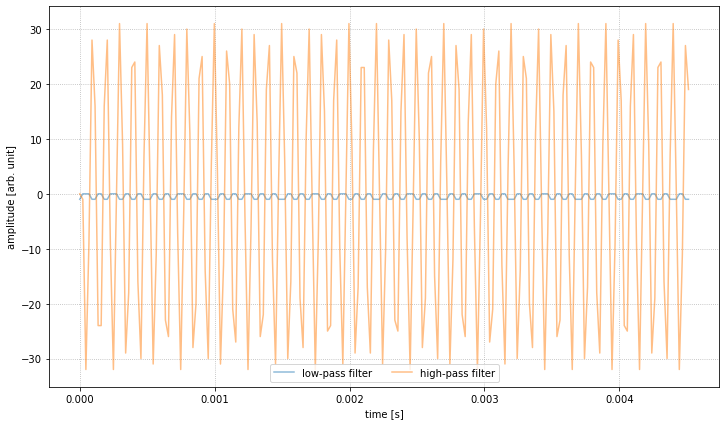

In [61]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_10k[:200]))*0.0000226747086299941, out_r_10k[:200], alpha=.5, label = 'low-pass filter')
ax.plot(np.arange(len(out_l_10k[:200]))*0.0000226747086299941, out_l_10k[:200], alpha=.5, label = 'high-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time_10k.pdf')

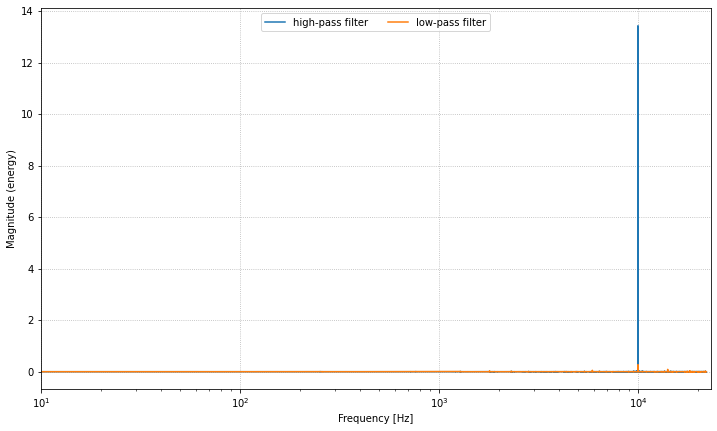

In [65]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_l_10k, Fs=44102, label = 'high-pass filter')
ax.magnitude_spectrum(out_r_10k, Fs=44102, label = 'low-pass filter')
ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=10)
ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq_10k.pdf')

In [66]:
np.savetxt('data/range_time_l_10k.csv', out_l_10k, delimiter=',')
np.savetxt('data/range_time_r_10k.csv', out_r_10k, delimiter=',')

In [67]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(10000000)

print('ok')

out_l_tmwstw = np.array(list(d[0:len(d):2]))
out_r_tmwstw = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_tmwstw)):
    if out_l_tmwstw[i] > 127:
        out_l_tmwstw[i] = out_l_tmwstw[i] - 256

for i in range(len(out_r_tmwstw)):
    if out_r_tmwstw[i] > 127:
        out_r_tmwstw[i] = out_r_tmwstw[i] - 256


ok


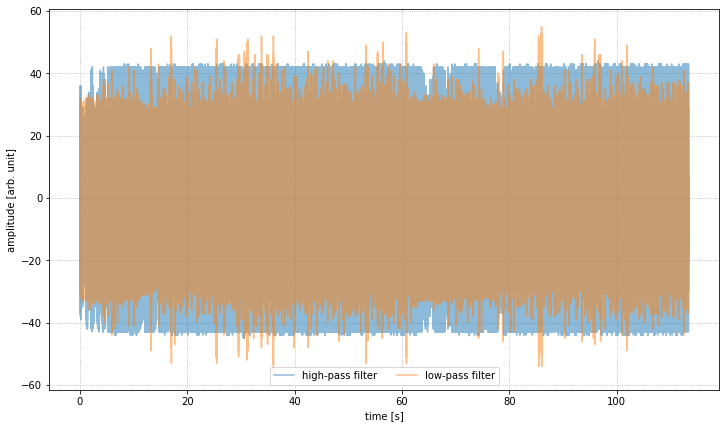

In [68]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_tmwstw))*0.0000226747086299941, out_r_tmwstw, alpha=.5, label = 'high-pass filter')
ax.plot(np.arange(len(out_l_tmwstw))*0.0000226747086299941, out_l_tmwstw, alpha=.5, label = 'low-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time_tmwstw.pdf')

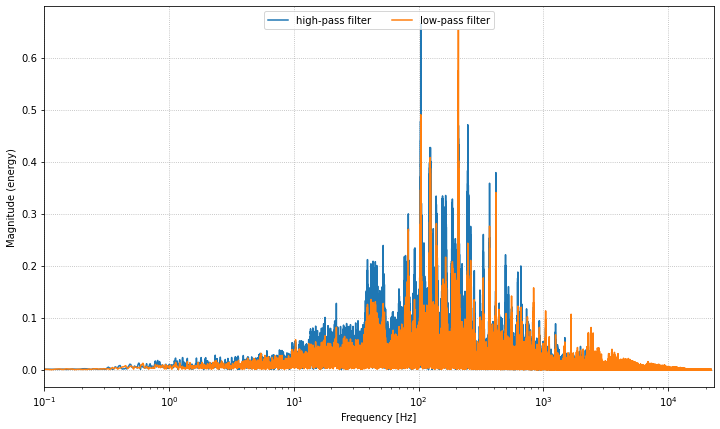

In [71]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_r_tmwstw, Fs=44102, label = 'high-pass filter')
ax.magnitude_spectrum(out_l_tmwstw, Fs=44102, label = 'low-pass filter')
ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=.10)
ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq_tmwstw.pdf')


np.savetxt('data/range_time_l_tmwstw.csv', out_l_tmwstw, delimiter=',')
np.savetxt('data/range_time_r_tmwstw.csv', out_r_tmwstw, delimiter=',')

ok


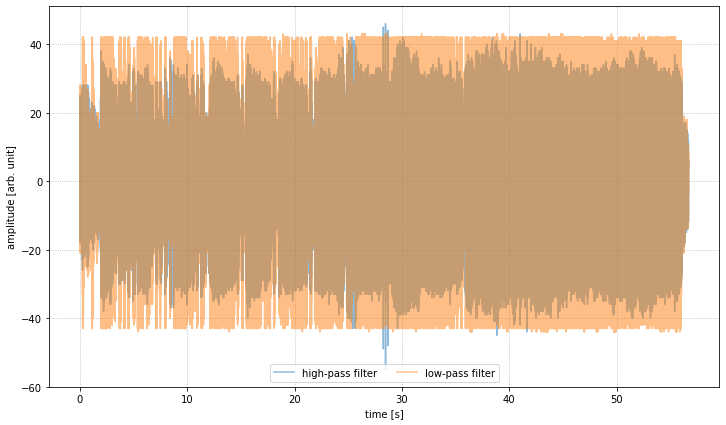

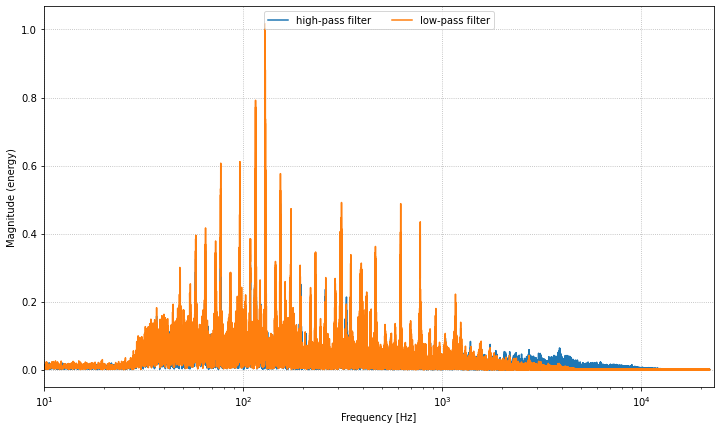

In [73]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(5000000)

print('ok')

out_l_BR = np.array(list(d[0:len(d):2]))
out_r_BR = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_BR)):
    if out_l_BR[i] > 127:
        out_l_BR[i] = out_l_BR[i] - 256

for i in range(len(out_r_BR)):
    if out_r_BR[i] > 127:
        out_r_BR[i] = out_r_BR[i] - 256


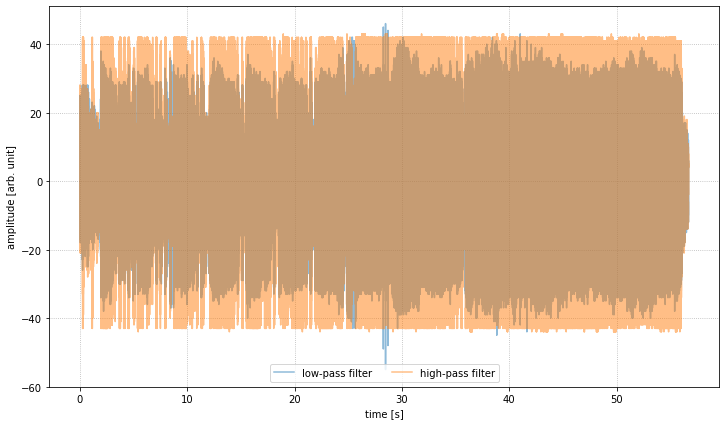

In [74]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_BR))*0.0000226747086299941, out_r_BR, alpha=.5, label = 'low-pass filter')
ax.plot(np.arange(len(out_l_BR))*0.0000226747086299941, out_l_BR, alpha=.5, label = 'high-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

fig.savefig('figures/low_high_response_time_BR.pdf')

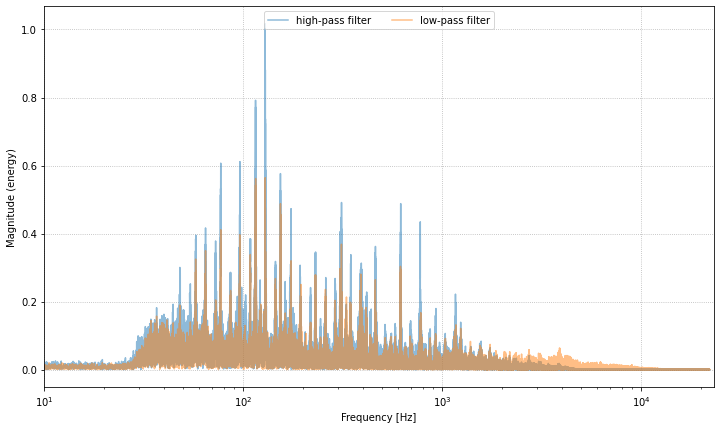

In [77]:

fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_l_BR, Fs=44102, alpha=.5, label = 'high-pass filter')
ax.magnitude_spectrum(out_r_BR, Fs=44102, alpha=.5, label = 'low-pass filter')

ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=10)
ax.set_xscale('log')

plt.show()

fig.savefig('figures/low_high_response_freq_BR.pdf')


In [ ]:
np.savetxt('data/range_time_l_BR.csv', out_l_BR, delimiter=',')
np.savetxt('data/range_time_r_BR.csv', out_r_BR, delimiter=',')

In [19]:
with serial.Serial('/dev/ttyUSB1', baudrate=1026364) as ser: #537619 115200
    d = ser.read(1000000)

print('ok')

out_l_canzone = np.array(list(d[0:len(d):2]))
out_r_canzone = np.array(list(d[1:len(d):2]))
for i in range(len(out_l_canzone)):
    if out_l_canzone[i] > 127:
        out_l_canzone[i] = out_l_canzone[i] - 256

for i in range(len(out_r_canzone)):
    if out_r_canzone[i] > 127:
        out_r_canzone[i] = out_r_canzone[i] - 256

ok


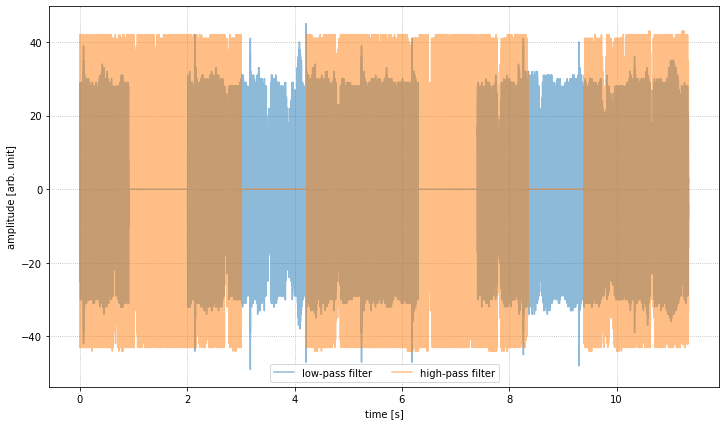

In [20]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(np.arange(len(out_r_canzone))*0.0000226747086299941, out_r_canzone, alpha=.5, label = 'low-pass filter')
ax.plot(np.arange(len(out_l_canzone))*0.0000226747086299941, out_l_canzone, alpha=.5, label = 'high-pass filter')
ax.set_xlabel('time [s]')
ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='lower center', ncol=2)
plt.show()

#fig.savefig('figures/low_high_response_time_canzone.pdf')

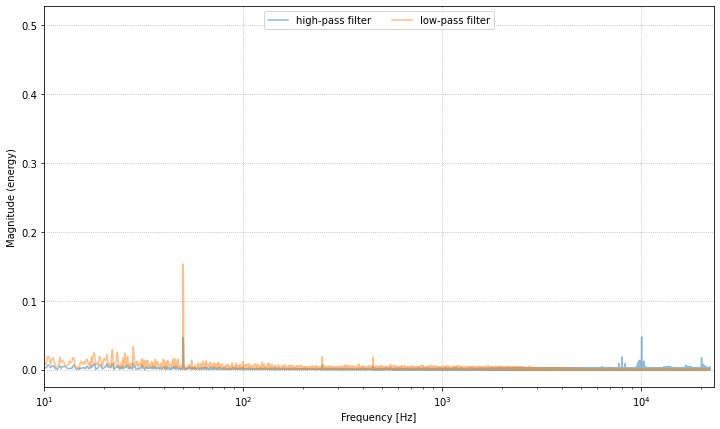

In [18]:
fig, ax = plt.subplots(figsize=(12,7))

ax.magnitude_spectrum(out_l_canzone, Fs=44102, alpha=.5, label = 'high-pass filter')
ax.magnitude_spectrum(out_r_canzone, Fs=44102, alpha=.5, label = 'low-pass filter')

ax.set_xlabel('Frequency [Hz]')
#ax.set_ylabel('amplitude [arb. unit]')
ax.grid(linestyle='dotted')
ax.legend(loc='upper center', ncol=2)

#ax.set_ylim(bottom=0, top=.1)
ax.set_xlim(left=10)
ax.set_xscale('log')

plt.show()

#fig.savefig('figures/low_high_response_freq_canzone.pdf')